## SELECTION DES ATTRIBUTS

#### EXO1

#### EXO2

In [642]:
import pandas as pd

In [643]:
import numpy as np

url = "./airquality.csv"
data = pd.read_csv(url, sep=',')

data = data[~np.isnan(data).any(axis=1)]

print(data.columns)

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')


In [644]:
data.shape

(111, 7)

In [645]:
data.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [646]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7


In [647]:
data = data.drop(data.columns[0], axis=1) 

Correlation matrix

In [648]:
df = pd.DataFrame(data)

correlation = df.corr()
print(correlation)

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.612497  0.698541  0.142885 -0.005190
Solar.R  0.348342  1.000000 -0.127183  0.294088 -0.074067 -0.057754
Wind    -0.612497 -0.127183  1.000000 -0.497190 -0.194496  0.049871
Temp     0.698541  0.294088 -0.497190  1.000000  0.403972 -0.096546
Month    0.142885 -0.074067 -0.194496  0.403972  1.000000 -0.009001
Day     -0.005190 -0.057754  0.049871 -0.096546 -0.009001  1.000000


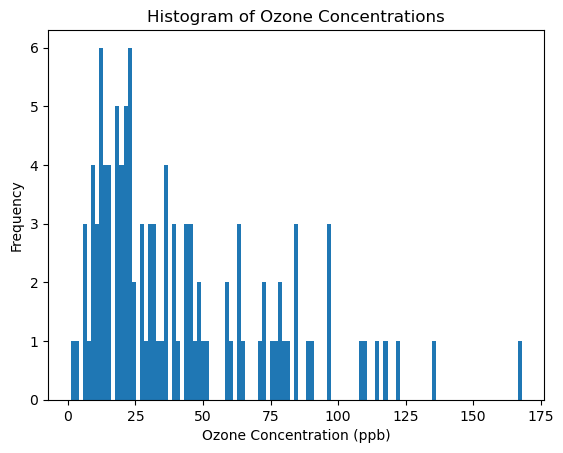

In [649]:
import matplotlib.pyplot as plt


plt.hist(data["Ozone"], bins=data.shape[0])

plt.xlabel("Ozone Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Histogram of Ozone Concentrations")

plt.show()

### preparation des training_data et test_data 

In [650]:
from sklearn.linear_model import Ridge



alpha = 1.0


ridge = Ridge(alpha=alpha)

# Linear regression

In [651]:
data.shape

(111, 6)

In [652]:
x = data['Wind']
y = data['Ozone']

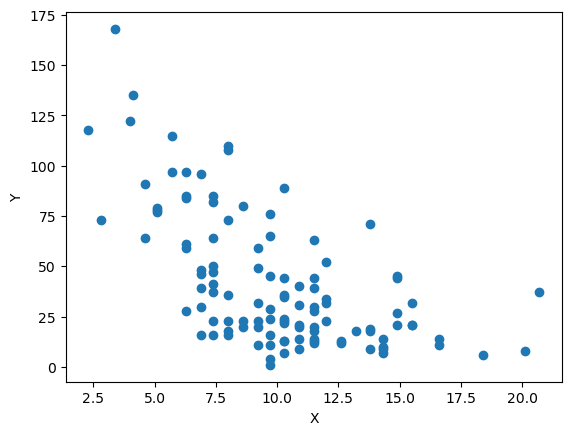

In [653]:
# Creating a scatter plot to visualize the generated data
# - x: Independent variable values (abscissa)
# - y: Dependent variable values (ordinate)
plt.scatter(x, y)

# Adding labels to the axes
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the plot
plt.show()

In [654]:
import numpy as np

# Convertir la série pandas en un tableau numpy
y_array = y.to_numpy()  # ou bien y.values

# dataliquer reshape sur le tableau numpy
y= y_array.reshape(y.shape[0], 1)

# Afficher la nouvelle forme de y après le remodelage
print(y.shape)

(111, 1)


In [655]:
x_array = x.to_numpy()
x= x_array.reshape(x.shape[0], 1)
print(x.shape)

(111, 1)


In [656]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(111, 2)


In [657]:
np.random.seed(0)  # Set the seed for reproducibility

# Generate a random vector theta with shape (2, 1) using a standard normal distribution
# The shape is (2, 1) indicating it's a column vector with 2 rows and 1 column
theta = np.random.randn(2, 1)

# Display the generated random vector theta
theta

array([[1.76405235],
       [0.40015721]])

In [658]:
X.shape

(111, 2)

In [659]:
theta.shape

(2, 1)

In [660]:
def Linear_model(X, theta):
    return X.dot(theta)

In [661]:
Linear_model(X, theta).shape

(111, 1)

In [662]:
x.shape

(111, 1)

In [663]:
y.shape

(111, 1)

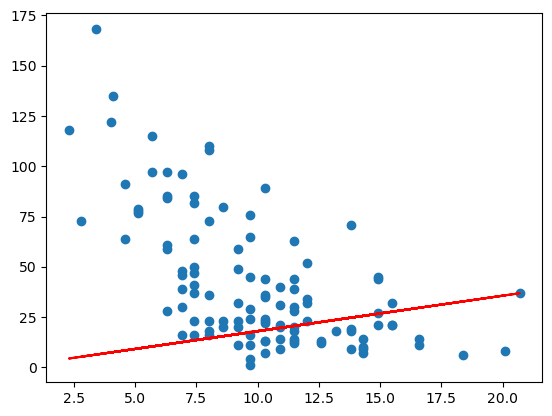

In [664]:
plt.scatter(x, y)
plt.plot(x, Linear_model(X, theta), c='red')

In [665]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((Linear_model(X, theta) - y)**2)

In [666]:
X.shape

(111, 2)

In [667]:
y.shape

(111, 1)

In [668]:
theta.shape

(2, 1)

In [669]:
cost_function(X, y, theta)

986.9062405057683

In [670]:
def grad(X, y, theta , alpha):
    m = len(y)
    return 1/m * alpha * X.T.dot(Linear_model(X, theta) - y)

In [671]:
def gradient_descent(X, y, theta, alpha, learning_rate, n_iterations):
    """
    Perform gradient descent to minimize the cost function.

    Parameters:
    - X: Feature matrix (including the intercept term)
    - y: Target values
    - theta: Initial model parameters
    - learning_rate: Learning rate for gradient descent
    - n_iterations: Number of iterations for gradient descent

    Returns:
    - Optimized model parameters theta
    - Array of cost history (evolution of cost function over iterations)
    """
    cost_history = np.zeros(n_iterations)  # Create an array to store the evolution of the cost function
    
    for i in range(n_iterations):
        # Update theta using gradient descent formula
        theta = theta - learning_rate * grad(X, y, theta, alpha)
        
        # Calculate the cost function value and store it in the cost_history array
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

In [672]:
n_iterations = 100
learning_rate = 0.0001
alpha = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, alpha, learning_rate, n_iterations)

In [673]:
theta_final

array([[1.77859141],
       [0.40256641]])

In [674]:
cost_history

array([986.88428178, 986.86232796, 986.84037903, 986.81843501,
       986.79649588, 986.77456165, 986.75263232, 986.73070788,
       986.70878833, 986.68687368, 986.66496391, 986.64305904,
       986.62115905, 986.59926396, 986.57737375, 986.55548842,
       986.53360799, 986.51173243, 986.48986176, 986.46799596,
       986.44613505, 986.42427902, 986.40242787, 986.38058159,
       986.35874019, 986.33690366, 986.31507201, 986.29324522,
       986.27142332, 986.24960628, 986.22779411, 986.2059868 ,
       986.18418437, 986.1623868 , 986.1405941 , 986.11880626,
       986.09702328, 986.07524517, 986.05347191, 986.03170352,
       986.00993998, 985.9881813 , 985.96642748, 985.94467851,
       985.92293439, 985.90119513, 985.87946072, 985.85773116,
       985.83600645, 985.81428659, 985.79257158, 985.77086141,
       985.74915609, 985.72745561, 985.70575998, 985.68406919,
       985.66238324, 985.64070213, 985.61902585, 985.59735442,
       985.57568782, 985.55402606, 985.53236913, 985.51

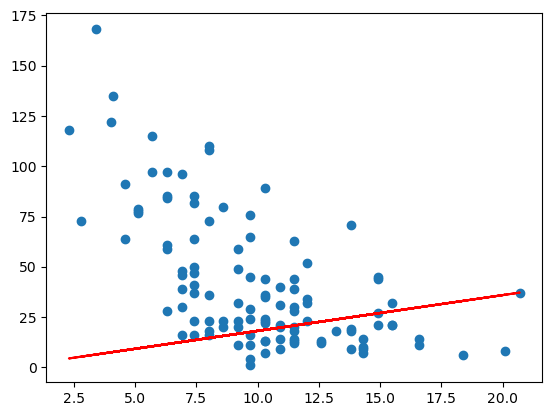

In [675]:
# Create predictions using the trained model and final parameters
predictions = Linear_model(X, theta_final)

# Plot the original data (in blue) and the predictions (in red)
plt.scatter(x, y)  # Scatter plot of the original data
plt.plot(x, predictions, c='r')  # Plot predictions against the x values

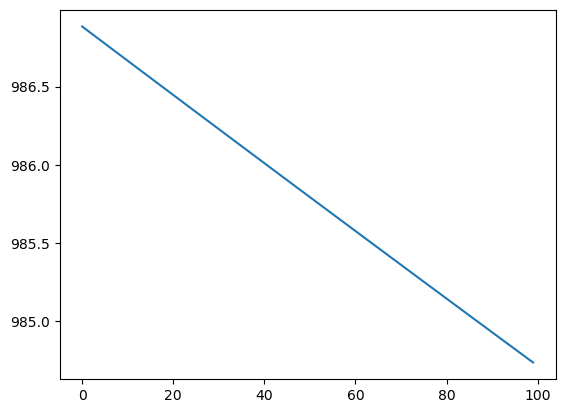

In [676]:
plt.plot(range(n_iterations), cost_history)

In [677]:
def coef_determination(y, pred):
    """
    Calculate the coefficient of determination (R^2 score).

    Parameters:
    - y: Array of true values
    - pred: Array of predicted values

    Returns:
    - Coefficient of determination (R^2 score)
    """
    u = ((y - pred)**2).sum()  # Sum of squared residuals (unexplained variance)
    v = ((y - y.mean())**2).sum()  # Total sum of squares (total variance)
    return 1 - u/v  # Coefficient of determination formula

In [678]:
coef_determination(y, predictions)

-0.7948080485175968